In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Reading the csv and making summary statistics/charts

In [4]:
def read_data(filename1):
    '''
    This function reads the filename and puts the data into a dataframe.
    
    input: the name of the file
    output: a dataframe    
    '''
    
    df = pd.read_csv(filename1 + '.csv', encoding = "ISO-8859-1")
    return df

In [5]:
df = read_data('credit-data')

In [6]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
def explore_analysis(column1, column2, option, df):
    '''
    This function returns three types of analysis (descriptive stats, groupby on mean, groupby on count) 
    give two columns of a dataframe.
    
    input:
        column1: the column for which we want statistics on a grouped data
        column2: the column on which grouping is performed
        
    output: 
        a dataframe with desired type of analysis    
    '''
    
    if option == 'describe':
        df_2 = df[column1].describe()
    elif option == 'groupby_mean':
        df_2 = df[column1].groupby(df[column2]).mean().reset_index()
    elif option == 'groupby_count':
        df_2 = df[column1].groupby(df[column2]).count().reset_index()
    
    return df_2    

In [10]:
df_desc_debtratio = explore_analysis('DebtRatio', None, 'describe', df)
df_desc_debtratio

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

The maximum debt ratio is 329,664 %. This cannot be possible and thus suggests that there is a data error.

In [11]:
# mean debt ratio for every age group
df_mean_debtratio = explore_analysis('DebtRatio', 'age', 'groupby_mean', df)
df_mean_debtratio.head()

,age,DebtRatio
0,0,0.436927
1,21,34.961721
2,22,27.833068
3,23,23.057826
4,24,47.577035


In [12]:
def seaborn_chart(x_1, y_1, data_1, xlabel_1):
    '''
    This function returns a chart for two columns (x-axis and y-axis)
    '''
    
    sns.set_style("whitegrid")
    ax = plt.subplots(figsize=(20, 6))
    ax = sns.barplot(x=x_1, y=y_1, data=data_1)
    ax.set(xlabel=xlabel_1)
    sns.plt.show()

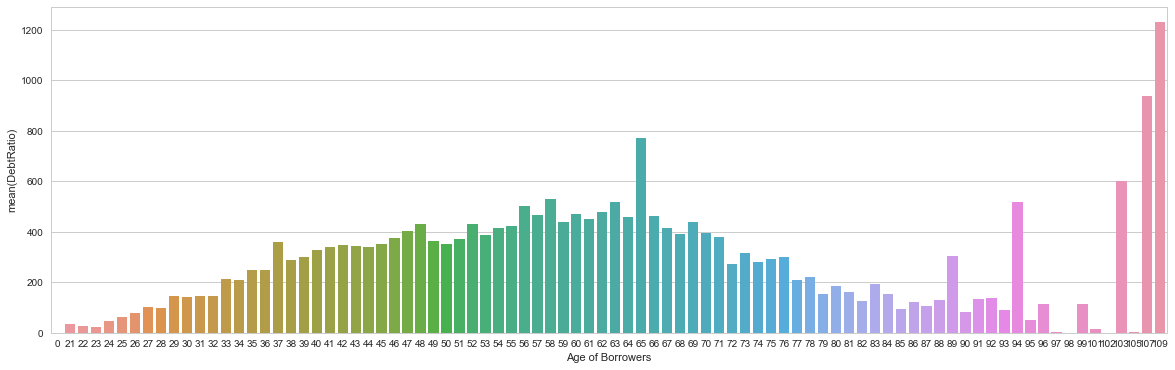

In [13]:
#visual
visual_age_debtratio = seaborn_chart('age', 'DebtRatio', df_mean_debtratio, 'Age of Borrowers')

As seen from the table and chart, as the age of the borrowers increase, their mean debt ratio also increases. One explanation for that is that people in mid age careers borrow more and therefore may have difficulties paying dues on time.

We can also see abormal debt ratios as well. People who are very old (i.e. > 100 years of age) have the highest debt ratio. This could be because of data entry errors, or because they have accumulated a lot of debt over the past and relative to their monthly incomes (or pensions), their debt ratios are the highest.

Anomalies: Age zero. It's a data entry error. Also, mean Debt ratios are as high as 1200%. This doesn't make sense.

In [14]:
# count of delinquency for every age group
df_count_delinquincy = explore_analysis('SeriousDlqin2yrs', 'age', 'groupby_count', df)
df_count_delinquincy.head()

,age,SeriousDlqin2yrs
0,0,1
1,21,183
2,22,434
3,23,641
4,24,816


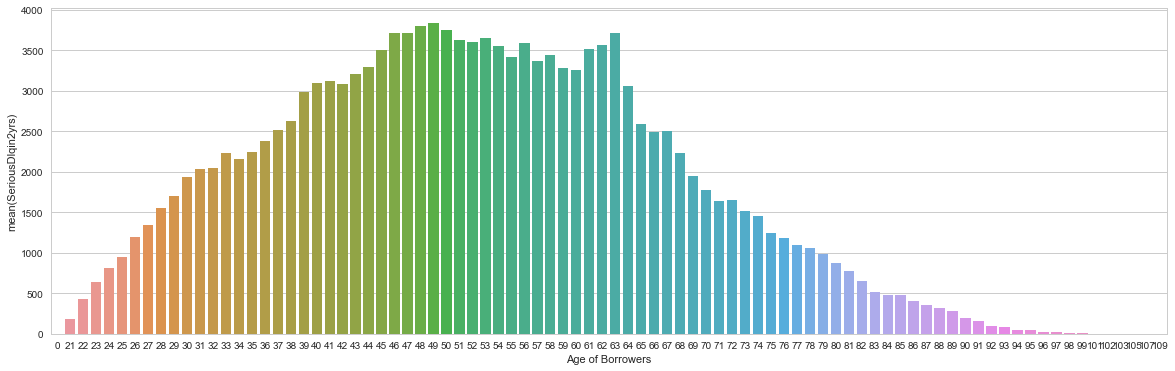

In [16]:
#visualization of the count of delinquincy for every age group
visual_age_seriousdlq = seaborn_chart('age', 'SeriousDlqin2yrs', df_count_delinquincy, 'Age of Borrowers')

This shows that a lot of borrowers are distributed between the ages of 30 and 65. That makes sense, as you age more,
your financial needs increase, and then you tend to borrow more. 

We also have some outliers i.e. a person aged above 100 years. This could be a real data or a data entry error.

In [17]:
# summary statistics of monthly income
df_desc_monthlyincome = explore_analysis('MonthlyIncome', None, 'describe', df)
df_desc_monthlyincome

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

The summary statistics of monthly income shows that the mean monthly income is dollars 6,670. We are dealing with a relatively middle-upper class group of people in the dataset. There are also anomalies in the data set i.e. the maximum monthly income for a person in the dataset is 3,008,750. Even Bill Gates doesn't earn that much income in a month.

In [18]:
# correlation of average monthly income with unpaid dues over past 90 days
df_income_90days = explore_analysis('MonthlyIncome', 'NumberOfTimes90DaysLate', 'groupby_mean', df)
df_income_90days = df_income_90days.round({'MonthlyIncome': 0})
df_income_90days.sort('MonthlyIncome', ascending=True).head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,NumberOfTimes90DaysLate,MonthlyIncome
18,98,2524.0
16,17,2700.0
15,15,3440.0
17,96,3754.0
8,8,4524.0


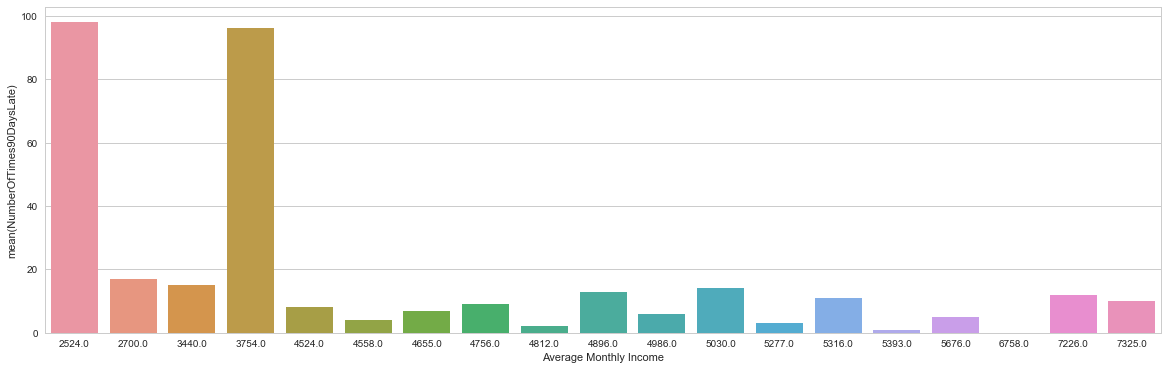

In [20]:
#visualization of correlation between number of times one is 90 days late and his/her monthly income
visual_monthlyincome_90dayslate = seaborn_chart('MonthlyIncome', 'NumberOfTimes90DaysLate', df_income_90days, 'Average Monthly Income')

People with average monthly incomes of dollar 2,523 and dollar 3,754 have the highest chances of paying dues beyond 90 days when they are due. This is strange because people earning average incomes between these two incomes have a very small chance of paying their dues beyond 90 days.

On average, there's random fluctuation over different income levels, showing that people even with higher monthly average incomes don't always pay their debts on time.

In [21]:
# correlation between number of dependents and number of open loans and lines of credit bought
df_dependents_credit = explore_analysis('NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents', 'groupby_count', df)
df_dependents_credit.head()

,NumberOfDependents,NumberOfOpenCreditLinesAndLoans
0,0.0,86902
1,1.0,26316
2,2.0,19522
3,3.0,9483
4,4.0,2862


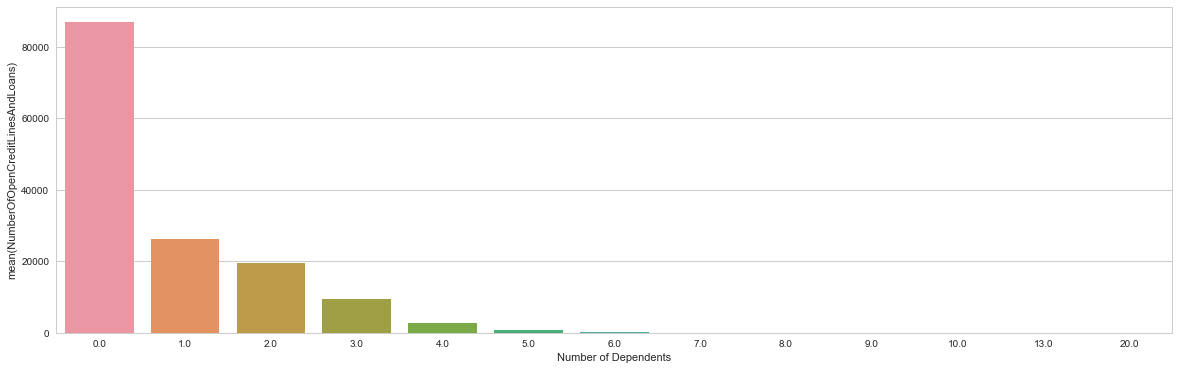

In [22]:
#visualization of the correlation b/w number of dependents and number of open loans and lines of credit bought
visual_dependents_creditlines = seaborn_chart('NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans', df_dependents_credit, 'Number of Dependents')

This diagram shows that as the number of dependents increase, people tend to borrow less loans. This is a little surprising since one would expect that having more dependents create more financial needs and therefore the desire to borrow more increases. One explanation for this trend could be that people only tend to have more children (or dependendents) when they become financiall more stable. Thus, more financially stable people take on the responsibility for more dependents.

In [23]:
# correlation between the location of a person and count of positive delinquincies

df_deliquint = df[df['SeriousDlqin2yrs'] == 1]

df_zipcode_delinquincy = explore_analysis('SeriousDlqin2yrs', 'zipcode', 'groupby_count', df_deliquint)
df_zipcode_delinquincy = df_zipcode_delinquincy.sort('SeriousDlqin2yrs', ascending=False)
df_zipcode_delinquincy.head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,zipcode,SeriousDlqin2yrs
2,60625,2188
7,60804,1163
4,60637,1148
6,60657,1135
1,60618,1117


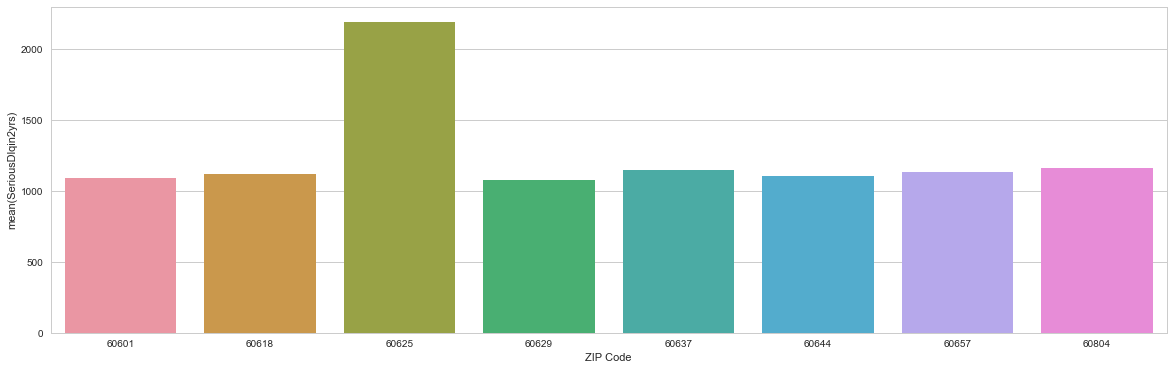

In [24]:
#visualization of correlation between the location of a person and count of positive delinquincies
visual_zipcode_srsdlq = seaborn_chart('zipcode', 'SeriousDlqin2yrs', df_zipcode_delinquincy, 'ZIP Code')

Neighborhood with Zip Codes 60625 has an unusually higher than average count of people who become seriously delinquint. The behavior of the rest of the neighborhoods is almost the same.

In [19]:
# Let's see what's that neighborhood called in which a lot of people become seriously delinquint in two years
import geocoder

In [20]:
geocoder.google('60625', method='reverse')

<[OK] Google - Reverse [N Shore Channel Trail, Chicago, IL 60625, USA]>